Zbiór danych pochodzi ze strony https://www.sciencedirect.com/science/article/pii/S2352340918315191#f0010 z ekstrakcji z baz danych SQL systemów zarządzania nieruchomościami (PMS) hoteli. Autorami są Nuno Antonio, Ana de Almeida oraz Luis Nunes. Zbiór jest połączeniem dwóch zbiorów danych hotelarskich: (H1) hotelu wypoczynkowego oraz (H2) hotelu miejskiego. Oba zbiory danych mają tę samą strukturę, z 31 zmiennymi opisującymi 40 060 obserwacji H1 i 79 330 obserwacji H2. Każda obserwacja reprezentuje rezerwację hotelową. Oba zbiory danych obejmują rezerwacje osób, które miały przybyć między 1 lipca 2015 a 31 sierpnia 2017, w tym rezerwacje osób, które faktycznie przybyły oraz rezerwacje, które zostały anulowane. Celem analizy jest klasyfikacja zmiennej is_canceled.

Opis cech występujących w zbiorze:
| Zmienna                       | Typ       | Opis                                                                                      |
|-------------------------------|-----------|-------------------------------------------------------------------------------------------|
| hotel                         | character | Hotel (H1 = Hotel wypoczynkowy lub H2 = Hotel Miejski)                                         |
| is_canceled                   | double    | Wartość wskazująca, czy rezerwacja została anulowana (1), czy nie (0)                    |
| lead_time                     | double    | Liczba dni od wprowadzenia rezerwacji do systemu PMS do daty przyjazdu                   |
| arrival_date_year             | double    | Rok daty przyjazdu                                                                       |
| arrival_date_month            | character | Miesiąc daty przyjazdu                                                                   |
| arrival_date_week_number      | double    | Numer tygodnia roku, w którym przypada data przyjazdu                                    |
| arrival_date_day_of_month     | double    | Dzień miesiąca, w którym przypada data przyjazdu                                         |
| stays_in_weekend_nights       | double    | Liczba noclegów w weekend (sobota lub niedziela)                                         |
| stays_in_week_nights          | double    | Liczba noclegów w dni robocze (poniedziałek-piątek)                                      |
| adults                        | double    | Liczba osób dorosłych                                                                    |
| children                      | double    | Liczba dzieci                                                                            |
| babies                        | double    | Liczba niemowląt                                                                         |
| meal                          | character | Rodzaj wykupionego wyżywienia: Undefined/SC (brak), BB (nocleg i śniadanie), HB (śniadanie i jeden dodatkowy posiłek), FB (pełne wyżywienie: śniadanie, obiad i kolacja)     |
| country                       | character | Kraj pochodzenia gościa w formacie ISO 3155-3:2013                                       |
| market_segment                | character | Segment marketu: Online/Offline TA/TO ( rezerwacja przez internet/na żywo za pośrednictwem biór podróży/touroperatorów, Direct (bezpośrednio w hotelu), Corporate (rezerwacja przez firmę))                               |
| distribution_channel          | character | Kanał dystrybucji: TA, TO                          |
| is_repeated_guest             | double    | Czy gość jest powracający (1), czy nie (0)                                               |
| previous_cancellations        | double    | Liczba anulowanych rezerwacji przed obecną                                               |
| previous_bookings_not_canceled| double    | Liczba rezerwacji, które nie zostały anulowane przed obecną                              |
| reserved_room_type            | character | Standard/rodzaju pokoju zarezerwowanego                                                      |
| assigned_room_type            | character | Standard/rodzaju pokoju przydzielonego                                                       |
| booking_changes               | double    | Liczba zmian wprowadzonych do rezerwacji                                                |
| deposit_type                  | character | Typ zaliczki: No Deposit (brak), Non Refund (bezzwrotna), Refundable (zwrotna)          |
| agent                         | character | ID biura podróży                                                                         |
| company                       | character | ID firmy/podmiotu opłacającego rezerwację                                                |
| days_in_waiting_list          | double    | Liczba dni na liście oczekujących                                                        |
| customer_type                 | character | Typ rezerwacji: Contract, Group, Transient, Transient-party                              |
| adr                           | double    | Średnia dzienna stawka (ADR)                                                            |
| required_car_parking_spaces   | double    | Liczba wymaganych miejsc parkingowych                                                   |
| total_of_special_requests     | double    | Liczba specjalnych życzeń                                                                |
| reservation_status            | character | Ostatni status rezerwacji: Canceled(rezerwacja została anulowana przez klienta), Check-Out (klient zameldował się, ale już wyjechał), No-Show (klient nie zameldował się i poinformował hotelu o powodzie)                                 |
| reservation_status_date       | double    | Data ustawienia ostatniego statusu rezerwacji (anulowanie rezerwacji lub wemeldowanie się)                                           |


### Wczytanie danych i bibliotek

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dane = pd.read_csv('hotel_bookings.csv')
dane.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
import dtale
dtale.show(dane)

In [28]:
#import sweetviz as sv

# Generowanie raportu
#report = sv.analyze(dane)
#report.show_html("sweetviz_raport.html")
#report.show_notebook("sweetviz_raport.html")


NameError: name 'close' is not defined

### Statystyki opisowe

In [30]:
import numpy as np

In [83]:
def opis(dane, kolumna):
    print(f"Średnia dla {kolumna}: ", np.round(np.mean(dane[kolumna]), decimals=2))
    print(f"Odchylenie standardowe dla {kolumna}: ", np.round(np.std(dane[kolumna]), decimals=2))
    print(f"Wariancja dla {kolumna}: ", np.round(np.var(dane[kolumna]), decimals=2))
    print(f"Kwantyle dla {kolumna}: ", np.quantile(dane[kolumna], q = np.array([0.25, 0.5, 0.75])))
    print(f"Minimum dla {kolumna}: ", np.round(np.min(dane[kolumna]) , decimals=2))
    print(f"Maksimum dla {kolumna}: ", np.round(np.max(dane[kolumna]) , decimals=2))
    print(f"Mediana dla {kolumna}: ", np.round(np.median(dane[kolumna]) , decimals=2))


In [99]:

def wykres(dane, kolumna, typ_wykresu, x_lab="Typ", y_lab="Ilość", rosnaco=False):
    wykresy = {
        'bar': lambda: dane[kolumna].value_counts().sort_values(ascending=rosnaco).plot(kind='bar'),
        'hist': lambda: dane[kolumna].plot(kind='hist', bins=15),
        'line': lambda: dane[kolumna].plot(kind='line'),
        'box': lambda: dane[kolumna].plot(kind='box'),
    }

    if typ_wykresu in wykresy:
        wykresy[typ_wykresu]() 

    plt.title(f"Wykres {typ_wykresu} dla {kolumna}")
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.show()
    


Lead time

In [84]:
opis(dane,'lead_time')

Średnia dla lead_time:  104.01
Odchylenie standardowe dla lead_time:  106.86
Wariancja dla lead_time:  11419.63
Kwantyle dla lead_time:  [ 18.  69. 160.]
Minimum dla lead_time:  0
Maksimum dla lead_time:  737
Mediana dla lead_time:  69.0


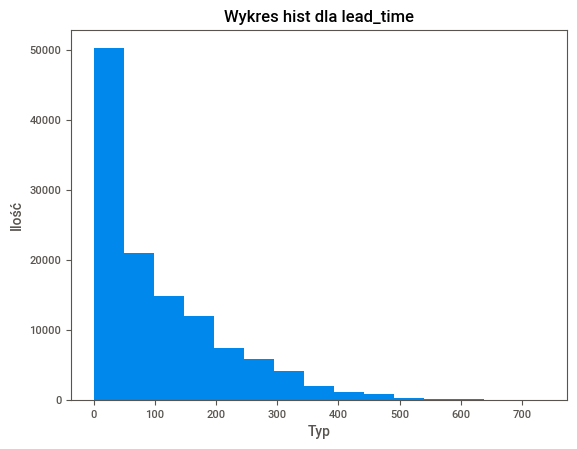

In [100]:
wykres(dane, 'lead_time', 'hist')


Heatmap

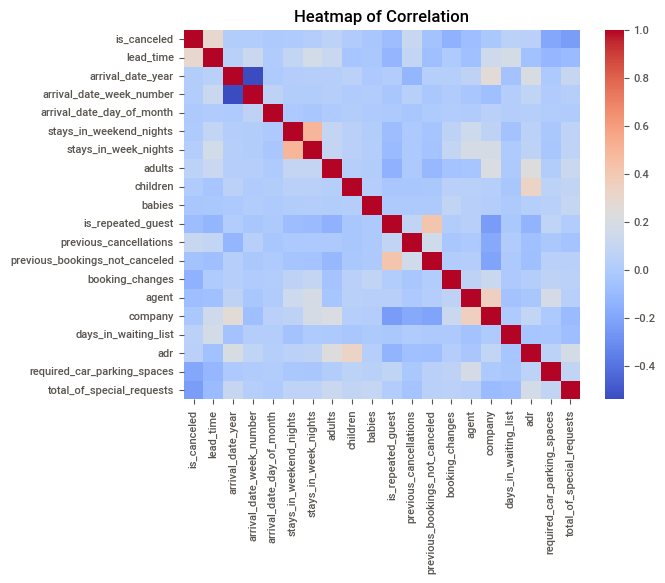

In [ ]:
dane_numeric = dane.select_dtypes(include=[np.number])

correlation_matrix = dane_numeric.corr()

sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Heatmap of Correlation")
plt.show()